Hi Sean,

 

Attached herewith is the Fuel Consumption and Events data info. 

The data shown in the attached file is per vehicle per day from 1st June onwards until 23rd September. 
Included is distance, fuel consumed, consumption (l/100km) and all possible events data.  For the events data I’ve hidden events or duration on certain events where it is not relevant for this exercise.  I’ve change the format of the duration column from seconds to hh:mm:ss so it easier to interpret.
For the vehicles that we used to transport Coal and Manganese, I’ve manage to get other days that the vehicles were driven.  So now on average there are a 100 vehicles utilised per day (see sheet labelled “Summary Consumption”)
For data integrity, I’ve looked at events where the value seem abnormal, I’ve verified with Mix’s Dynamix system, and they match or closely match.  I’ve tested 4 events (this are highlighted in yellow) and shown screenshots as well.
For simplicity, I’ve included assigned 1 driver to a vehicle where a vehicle was driven by 2 or more drivers.
 

@ Christo – I’ve save the Fuel Consumption & Events  data in pipe delimiter format on a separate sheet for ease of use.

 

Please reach out to me if you have any concerns and queries and will gladly assist.

 

Kind regards,

Nayan

In [1]:
import xlrd

import sys
import re
import pandas as pd
import numpy as np

data_path='/media/lnr-ai/christo/github_repos/logistics/data/'

def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

# trips_df=pd.read_excel('/media/lnr-ai/christo/github_repos/logistics/data/Trips.xlsx', sheet_name='Sheet1')

In [2]:
sheet_name='Data - Pipe Delimiter'

In [138]:
filename='Fuel Consumption & Events Data (1).xlsx'
# sheet_name='Fuel Consumption & Events Data'
df=pd.read_excel('/media/lnr-ai/christo/github_repos/logistics/data/{filename}'.format(filename=filename), sheet_name=sheet_name)

In [139]:
column_names=list(df)[0].split('|')
df.rename(columns={list(df)[0]:'column1'},inplace=True)
gf=df['column1'].str.split('|').copy()
frame = { 'column1': gf} 
temp_df = pd.DataFrame(frame) 
temp_df=pd.DataFrame(temp_df.column1.tolist(), index= temp_df.index)
temp_df.columns=column_names

In [140]:
set(temp_df['.TAR - Alert Possible Accident >20km/h/s Duration'])

{'', '-', '0'}

In [104]:
categorical_columns=['Date',
 'VIN',
 'AssetID',
 'Driver',
 'Vehicle Description']

In [105]:
numerical_columns=list(set(column_names)-set(categorical_columns))

In [106]:
list(temp_df)

['Date',
 'VIN',
 'AssetID',
 'Driver',
 'Vehicle Description',
 'Distance',
 'Fuel Consumed',
 'l/100km',
 '.Impact Detected >13 (MV) Count',
 '.Impact Detected >13 (MV) Duration',
 '.TAR - Alert Possible Accident >20km/h/s Count',
 '.TAR - Alert Possible Accident >20km/h/s Duration',
 '.TAR - Excessive Idling > 10min Count',
 '.TAR - Excessive Idling > 10min Duration',
 '.TAR - Over Speeding > 90km/h > 1 Min (Trucks) Count',
 '.TAR - Over Speeding > 90km/h > 1 Min (Trucks) Duration',
 '.TAR - Over Speeding > 100km/h (Trucks) Count',
 '.TAR - Over Speeding > 100km/h (Trucks) Duration',
 '*After Hour Count',
 '*After Hour Duration',
 '*Asset in Workshop Hours Count',
 '*Asset in Workshop Hours Duration',
 'GPS Jamming Detected - Critical Count',
 'GPS Jamming Detected - Critical Duration',
 'GPS Jamming Status - Unknown Status Count',
 'GPS Jamming Status - Unknown Status Duration',
 'GSM Status - Jamming detected Count',
 'GSM Status - Jamming detected Duration',
 'GSM Status - Possib

In [107]:
set(temp_df['Road Speed Overspeeding Duration'])

{'',
 '0,0433796296296296',
 '0,00358796296296296',
 '0,00622685185185185',
 '0,00465277777777778',
 '0,00427083333333333',
 '0,00756944444444444',
 '0,0059375',
 '0,000208333333333333',
 '4,27256944444444',
 '0,00482638888888889',
 '0,00635416666666667',
 '0,00701388888888889',
 '0,00219907407407407',
 '0,0681597222222222',
 '0,0172222222222222',
 '0,0426967592592592',
 '0,010162037037037',
 '0,00715277777777778',
 '0,16869212962963',
 '0,139756944444444',
 '0,00726851851851852',
 '0,000578703703703704',
 '0,00788194444444444',
 '0,0507523148148148',
 '0,0041087962962963',
 '0,456053240740741',
 '0,0021412037037037',
 '0,00818287037037037',
 '0,00539351851851852',
 '0,00619212962962963',
 '0,00230324074074074',
 '0,00387731481481482',
 '0,00136574074074074',
 '0,011099537037037',
 '0,00548611111111111',
 '0,00658564814814815',
 '0,00127314814814815',
 '0,0990277777777778',
 '0,0492824074074074',
 '0,00888888888888889',
 '0,00991898148148148',
 '0,00106481481481482',
 '0,00321759259259

In [108]:
list(temp_df)

['Date',
 'VIN',
 'AssetID',
 'Driver',
 'Vehicle Description',
 'Distance',
 'Fuel Consumed',
 'l/100km',
 '.Impact Detected >13 (MV) Count',
 '.Impact Detected >13 (MV) Duration',
 '.TAR - Alert Possible Accident >20km/h/s Count',
 '.TAR - Alert Possible Accident >20km/h/s Duration',
 '.TAR - Excessive Idling > 10min Count',
 '.TAR - Excessive Idling > 10min Duration',
 '.TAR - Over Speeding > 90km/h > 1 Min (Trucks) Count',
 '.TAR - Over Speeding > 90km/h > 1 Min (Trucks) Duration',
 '.TAR - Over Speeding > 100km/h (Trucks) Count',
 '.TAR - Over Speeding > 100km/h (Trucks) Duration',
 '*After Hour Count',
 '*After Hour Duration',
 '*Asset in Workshop Hours Count',
 '*Asset in Workshop Hours Duration',
 'GPS Jamming Detected - Critical Count',
 'GPS Jamming Detected - Critical Duration',
 'GPS Jamming Status - Unknown Status Count',
 'GPS Jamming Status - Unknown Status Duration',
 'GSM Status - Jamming detected Count',
 'GSM Status - Jamming detected Duration',
 'GSM Status - Possib

In [109]:
fname='data pipe delimited.csv'
temp_df.to_csv(path_or_buf='/media/lnr-ai/christo/github_repos/logistics/data/{fname}'.format(fname=fname), index=False)

In [110]:
pd.read_csv(filepath_or_buffer='/media/lnr-ai/christo/github_repos/logistics/data/{fname}'.format(fname=fname),delimiter='|')

,"Date,VIN,AssetID,Driver,Vehicle Description,Distance,Fuel Consumed,l/100km,.Impact Detected >13 (MV) Count,.Impact Detected >13 (MV) Duration,.TAR - Alert Possible Accident >20km/h/s Count,.TAR - Alert Possible Accident >20km/h/s Duration,.TAR - Excessive Idling > 10min Count,.TAR - Excessive Idling > 10min Duration,.TAR - Over Speeding > 90km/h > 1 Min (Trucks) Count,.TAR - Over Speeding > 90km/h > 1 Min (Trucks) Duration,.TAR - Over Speeding > 100km/h (Trucks) Count,.TAR - Over Speeding > 100km/h (Trucks) Duration,*After Hour Count,*After Hour Duration,*Asset in Workshop Hours Count,*Asset in Workshop Hours Duration,GPS Jamming Detected - Critical Count,GPS Jamming Detected - Critical Duration,GPS Jamming Status - Unknown Status Count,GPS Jamming Status - Unknown Status Duration,GSM Status - Jamming detected Count,GSM Status - Jamming detected Duration,GSM Status - Possible Jamming Count,GSM Status - Possible Jamming Duration,Harsh acceleration Count,Harsh acceleration Duration,Harsh braking Count,Harsh braking Duration,Idle Count,Idle Duration,Idle - excessive Count,Idle - excessive Duration,Ignition On [Activate Relay Drive Off) Count,Ignition On [Activate Relay Drive Off) Duration,Over revving Count,Over revving Duration,Over speeding Count,Over speeding Duration,Road Speed Overspeeding Count,Road Speed Overspeeding Duration"
0,"43984,YV2AS02D0EM920019,-3156415588845969691,C..."
1,"43984,YV2AS02D1DA751113,-7991957635277756460,L..."
2,"43984,YV2AS02D1EM918781,323706904892283500,RYN..."
3,"43984,YV2AS02D1EM920014,-693733523852292026,DA..."
4,"43984,YV2AS02D2EM921043,-6163482328045875545,J..."
...,...
11578,"44097,YV2XS02DXKM356922,2002640156064454910,LI..."
11579,"44097,YV2XS02DXKM958119,883817426691706880,VUS..."
11580,"44097,YV2XS02DXKM958489,891421899523198976,MIC..."
11581,"44097,YV2XS02DXKM958492,891421901188337664,MAB..."


In [111]:
pd.read_csv(filepath_or_buffer='/media/lnr-ai/christo/github_repos/logistics/data/{fname}'.format(fname=fname))

,Date,VIN,AssetID,Driver,Vehicle Description,Distance,Fuel Consumed,l/100km,.Impact Detected >13 (MV) Count,.Impact Detected >13 (MV) Duration,...,Idle - excessive Count,Idle - excessive Duration,Ignition On [Activate Relay Drive Off) Count,Ignition On [Activate Relay Drive Off) Duration,Over revving Count,Over revving Duration,Over speeding Count,Over speeding Duration,Road Speed Overspeeding Count,Road Speed Overspeeding Duration
0,43984,YV2AS02D0EM920019,-3156415588845969691,COVERWELL MAPFUMO,CFG22262,"77,209",30,"38,8555738320662",-,-,...,-,-,-,-,-,-,5,"0,000300925925925926",2,0
1,43984,YV2AS02D1DA751113,-7991957635277756460,LUKA NKATA,CFG31334,"240,35",142,"59,0805075930934",-,-,...,-,-,-,-,-,-,17,"0,000671296296296296",1,0
2,43984,YV2AS02D1EM918781,323706904892283500,RYNO MAARMAN,CFG25761,"29,992","26,5","88,3568951720459",-,-,...,2,"0,00928240740740741",-,-,-,-,1,"0,000185185185185185",3,"4,62962962962963E-05"
3,43984,YV2AS02D1EM920014,-693733523852292026,DARRYL BEUKES,CFG27610,"448,172","226,5","50,5386324893121",-,-,...,4,"0,00403935185185185",-,-,-,-,138,"0,0741319444444444",8,"0,000717592592592593"
4,43984,YV2AS02D2EM921043,-6163482328045875545,JOINAH MACHAKACHE,CFG31922,"145,155","66,5","45,8130963452861",-,-,...,1,"0,0016087962962963",-,-,-,-,6,"0,000497685185185185",6,"0,00354166666666667"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11578,44097,YV2XS02DXKM356922,2002640156064454910,LINCOLN DUBE,CFG2931,"475,665",161,"33,8473505513334",-,-,...,4,"0,00693287037037037",-,-,-,-,59,"0,00452546296296296",-,-
11579,44097,YV2XS02DXKM958119,883817426691706880,VUSUMUZI SIBEKO,CFG38981,"143,014","56,5","39,5066217293412",-,-,...,1,"0,00130787037037037",-,-,-,-,63,"0,00734953703703704",-,-
11580,44097,YV2XS02DXKM958489,891421899523198976,MICHAEL THEMBALANI SITHOLE,CFG8834,"215,6","105,5","48,9332096474954",-,-,...,-,-,-,-,-,-,14,"0,000775462962962963",-,-
11581,44097,YV2XS02DXKM958492,891421901188337664,MABULELA NTSAMAI,CFG11199,"53,1","21,5","40,4896421845574",-,-,...,-,-,-,-,-,-,6,"0,000231481481481481",-,-


In [143]:
for numerical_column in numerical_columns:
#     print(numerical_column)
    temp_df[numerical_column]=temp_df[numerical_column].str.replace(',','.')
#     temp_df[numerical_column]=temp_df[numerical_column].str.replace('-','0')

In [145]:
for numerical_column in numerical_columns:
#     print(numerical_column)
    temp_df[numerical_column]=temp_df[numerical_column].str.replace('-','0')
#     temp_df[numerical_column]=temp_df[numerical_column].str.replace('-','0')

In [146]:
temp_df['Fuel Consumed']

0           30
1          142
2         26.5
3        226.5
4         66.5
         ...  
11578      161
11579     56.5
11580    105.5
11581     21.5
11582       60
Name: Fuel Consumed, Length: 11583, dtype: object

In [147]:
temp_df[numerical_column].str.strip()
for numerical_column in numerical_columns:
#     print(numerical_column)
    temp_df[numerical_column]=temp_df[numerical_column].str.strip()
#     temp_df[numerical_column]=temp_df[numerical_column].str.replace('','0')

In [150]:
set(temp_df[numerical_column])

{'', '0'}

In [153]:
temp_df.loc[temp_df[numerical_column]=='',numerical_column]=0

In [155]:
# temp_df[numerical_column].str.strip()
for numerical_column in numerical_columns:
#     print(numerical_column)
    temp_df.loc[temp_df[numerical_column]=='',numerical_column]=0
#     temp_df[numerical_column]=temp_df[numerical_column].str.replace('','0')

In [156]:
for numerical_column in numerical_columns:
#     print(numerical_column)
#     temp_df[numerical_column]=temp_df[numerical_column].str.replace('','0')
    temp_df[numerical_column]=temp_df[numerical_column].astype(float)
#     print(min(temp_df[numerical_column]))

.TAR - Alert Possible Accident >20km/h/s Duration
.TAR - Over Speeding > 100km/h (Trucks) Duration
Idle - excessive Duration
Harsh braking Count
Road Speed Overspeeding Count
.TAR - Over Speeding > 90km/h > 1 Min (Trucks) Duration
Harsh braking Duration
*Asset in Workshop Hours Duration
l/100km
.TAR - Excessive Idling > 10min Duration
.Impact Detected >13 (MV) Duration
.TAR - Alert Possible Accident >20km/h/s Count
Harsh acceleration Count
Over revving Count
Over speeding Duration
.TAR - Over Speeding > 90km/h > 1 Min (Trucks) Count
Fuel Consumed
Idle - excessive Count
.TAR - Excessive Idling > 10min Count
GPS Jamming Detected - Critical Count
.TAR - Over Speeding > 100km/h (Trucks) Count
Distance
GPS Jamming Detected - Critical Duration
Idle Duration
*After Hour Duration
Idle Count
GPS Jamming Status - Unknown Status Duration
GSM Status - Jamming detected Count
Harsh acceleration Duration
.Impact Detected >13 (MV) Count
*After Hour Count
Ignition On [Activate Relay Drive Off) Duration

In [160]:
max(temp_df['Fuel Consumed'])

974.0

In [164]:
temp_df['fuel consumption']=temp_df['Fuel Consumed']/temp_df['Distance']

In [175]:
f=(np.isfinite(temp_df['fuel consumption']))&(temp_df['fuel consumption']<1)

array([[<AxesSubplot:title={'center':'fuel consumption'}>]], dtype=object)

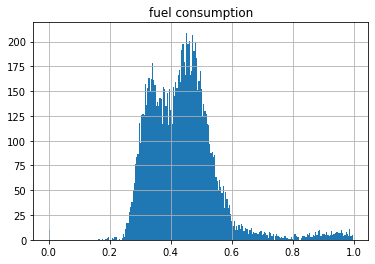

In [176]:
temp_df[f].hist(column='fuel consumption',bins=250)

In [172]:
temp_df[np.isfinite(temp_df['fuel consumption'])].mean()

Date                                                                inf
Distance                                                   6.094997e+02
Fuel Consumed                                              2.578261e+02
l/100km                                                    5.534505e+01
.Impact Detected >13 (MV) Count                            5.647610e-02
.Impact Detected >13 (MV) Duration                         0.000000e+00
.TAR - Alert Possible Accident >20km/h/s Count             1.570226e-02
.TAR - Alert Possible Accident >20km/h/s Duration          0.000000e+00
.TAR - Excessive Idling > 10min Count                      2.897545e-01
.TAR - Excessive Idling > 10min Duration                   0.000000e+00
.TAR - Over Speeding > 90km/h > 1 Min (Trucks) Count       3.643619e-03
.TAR - Over Speeding > 90km/h > 1 Min (Trucks) Duration    0.000000e+00
.TAR - Over Speeding > 100km/h (Trucks) Count              7.026980e-03
.TAR - Over Speeding > 100km/h (Trucks) Duration           0.000

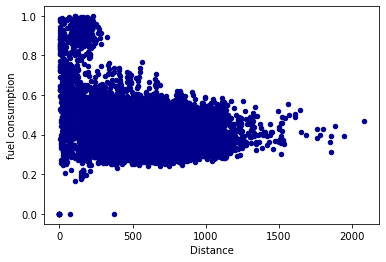

In [177]:
ax1 = temp_df[f].plot.scatter(x='Distance',
                      y='fuel consumption',
                      c='DarkBlue')